In [1]:
#Using Google Search to obtain closest amenities by cities
# code by Sue Del Carpio Bellido

# Dependencies
import requests
import json
import pandas as pd


# Google developer API key
from config import gkey_places

file_one = "../Raw_Data/1-1.LA_cities_Lat_lng_codes_data.csv"
cities_tot_df = pd.read_csv(file_one, encoding = "ISO-8859-1")

cities_tot_df = cities_tot_df.rename(columns={"address":"City"})
cities_tot_df


,City,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849
3,Lancaster,40.037875,-76.305514,40.073041,-76.254084,40.006910,-76.346614
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107
5,Santa Clarita,34.391664,-118.542586,34.477524,-118.376071,34.340498,-118.613192
6,Pomona,34.055103,-117.749991,34.112936,-117.711067,34.018512,-117.828817
7,Torrance,33.835849,-118.340629,33.887061,-118.308127,33.780217,-118.394091
8,Pasadena,34.147785,-118.144515,34.251905,-118.065479,34.117037,-118.198139
9,Inglewood,33.961680,-118.353131,33.982970,-118.313391,33.925177,-118.378850


In [2]:
#Filter only selected cities for analysis
selected_cities=['Alhambra','Burbank','Inglewood','Glendale','Long Beach','Los Angeles','Palmdale','Pasadena','Santa Clarita','Torrance']
cities_df=cities_tot_df[cities_tot_df['City'].isin(selected_cities)]
cities_df

,City,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107
5,Santa Clarita,34.391664,-118.542586,34.477524,-118.376071,34.340498,-118.613192
7,Torrance,33.835849,-118.340629,33.887061,-118.308127,33.780217,-118.394091
8,Pasadena,34.147785,-118.144515,34.251905,-118.065479,34.117037,-118.198139
9,Inglewood,33.961680,-118.353131,33.982970,-118.313391,33.925177,-118.378850
14,Burbank,34.180839,-118.308966,34.221654,-118.280109,34.142367,-118.370313
18,Alhambra,34.095287,-118.127015,34.111146,-118.108181,34.059921,-118.164835


In [3]:
# AIRPORTS close to cities
cities_df["airport"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in cities_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 5000
    target_type = "airport"
    #target_keyword ="airport"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    airport_data = response.json()

    #print(json.dumps(airport_data, indent=4, sort_keys=True))

    counter = 0
    for airport in airport_data["results"]:
        #print(airport["name"])
        #print(airport["vicinity"])
        #print(airport["name"].upper().find("AIRPORT"))
        
        if airport["name"].upper().find("AIRPORT")>0:
            counter += 1
            
        
    cities_df.set_value(index,"airport",counter)
cities_df

c:\anaconda\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng,airport
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176,0
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966,0
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849,0
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107,0
5,Santa Clarita,34.391664,-118.542586,34.477524,-118.376071,34.340498,-118.613192,0
7,Torrance,33.835849,-118.340629,33.887061,-118.308127,33.780217,-118.394091,0
8,Pasadena,34.147785,-118.144515,34.251905,-118.065479,34.117037,-118.198139,0
9,Inglewood,33.961680,-118.353131,33.982970,-118.313391,33.925177,-118.378850,4
14,Burbank,34.180839,-118.308966,34.221654,-118.280109,34.142367,-118.370313,2
18,Alhambra,34.095287,-118.127015,34.111146,-118.108181,34.059921,-118.164835,0


In [4]:
# PUBLIC TRANSPORTATION close to cities
cities_df["public_transportation"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in cities_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 8000
    target_type = ["light_rail_station",
                "transit_station","subway_station"]
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    train_data = response.json()

    #print(json.dumps(train_data, indent=4, sort_keys=True))

    counter = 0
    for train in train_data["results"]:
        #print(train["name"])
        #print(train["vicinity"])
        counter += 1
        
    cities_df.set_value(index,"public_transportation",counter)
cities_df

c:\anaconda\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng,airport,public_transportation
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176,0,19
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966,0,8
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849,0,4
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107,0,0
5,Santa Clarita,34.391664,-118.542586,34.477524,-118.376071,34.340498,-118.613192,0,0
7,Torrance,33.835849,-118.340629,33.887061,-118.308127,33.780217,-118.394091,0,1
8,Pasadena,34.147785,-118.144515,34.251905,-118.065479,34.117037,-118.198139,0,9
9,Inglewood,33.961680,-118.353131,33.982970,-118.313391,33.925177,-118.378850,4,11
14,Burbank,34.180839,-118.308966,34.221654,-118.280109,34.142367,-118.370313,2,0
18,Alhambra,34.095287,-118.127015,34.111146,-118.108181,34.059921,-118.164835,0,13


In [5]:
# PARKS close to cities
cities_df["park"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in cities_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 8000
    target_type = "park"
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    park_data = response.json()

    #print(json.dumps(park_data, indent=4, sort_keys=True))

    counter = 0
    for park in park_data["results"]:
        #print(park["name"])
        #print(park["vicinity"])
        #print(park["rating"])
        #if park["rating"]>3:
        counter += 1
                
    cities_df.set_value(index,"park",counter)
cities_df

c:\anaconda\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng,airport,public_transportation,park
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176,0,19,16
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966,0,8,15
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849,0,4,17
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107,0,0,20
5,Santa Clarita,34.391664,-118.542586,34.477524,-118.376071,34.340498,-118.613192,0,0,14
7,Torrance,33.835849,-118.340629,33.887061,-118.308127,33.780217,-118.394091,0,1,15
8,Pasadena,34.147785,-118.144515,34.251905,-118.065479,34.117037,-118.198139,0,9,15
9,Inglewood,33.961680,-118.353131,33.982970,-118.313391,33.925177,-118.378850,4,11,16
14,Burbank,34.180839,-118.308966,34.221654,-118.280109,34.142367,-118.370313,2,0,16
18,Alhambra,34.095287,-118.127015,34.111146,-118.108181,34.059921,-118.164835,0,13,14


In [6]:
# SHOPPING MALLS close to cities
cities_df["shopping_mall"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in cities_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 5000
    target_type = "shopping_mall"
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    shopping_mall_data = response.json()

    #print(json.dumps(shopping_mall_data, indent=4, sort_keys=True))

    counter = 0
    for shopping_mall in shopping_mall_data["results"]:
        #print(shopping_mall["name"])
        #print(shopping_mall["vicinity"])
        #print(shopping_mall["rating"])
        
        try:
            if shopping_mall["rating"]>4:
                counter += 1
        except KeyError:
            continue
        
                
    cities_df.set_value(index,"shopping_mall",counter)
cities_df.head()

c:\anaconda\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng,airport,public_transportation,park,shopping_mall
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176,0,19,16,11
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966,0,8,15,13
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849,0,4,17,11
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107,0,0,20,3
5,Santa Clarita,34.391664,-118.542586,34.477524,-118.376071,34.340498,-118.613192,0,0,14,12


In [7]:
# Visualize the DataFrame
cities_df

,City,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng,airport,public_transportation,park,shopping_mall
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176,0,19,16,11
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966,0,8,15,13
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849,0,4,17,11
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107,0,0,20,3
5,Santa Clarita,34.391664,-118.542586,34.477524,-118.376071,34.340498,-118.613192,0,0,14,12
7,Torrance,33.835849,-118.340629,33.887061,-118.308127,33.780217,-118.394091,0,1,15,12
8,Pasadena,34.147785,-118.144515,34.251905,-118.065479,34.117037,-118.198139,0,9,15,10
9,Inglewood,33.961680,-118.353131,33.982970,-118.313391,33.925177,-118.378850,4,11,16,11
14,Burbank,34.180839,-118.308966,34.221654,-118.280109,34.142367,-118.370313,2,0,16,9
18,Alhambra,34.095287,-118.127015,34.111146,-118.108181,34.059921,-118.164835,0,13,14,8


In [8]:
cities_dfb=cities_df[['City','public_transportation','park','shopping_mall','airport']]
cities_dfb.head()

,City,public_transportation,park,shopping_mall,airport
0,Los Angeles,19,16,11,0
1,Long Beach,8,15,13,0
2,Glendale,4,17,11,0
4,Palmdale,0,20,3,0
5,Santa Clarita,0,14,12,0


In [9]:
##Unpivot data for Seaborn plots
##Code by Lindsay Yang
cities_dfc=pd.melt(cities_dfb, id_vars=['City'], value_vars=['public_transportation', 'park','shopping_mall','airport'])

In [10]:
cities=cities_dfb[['City']]

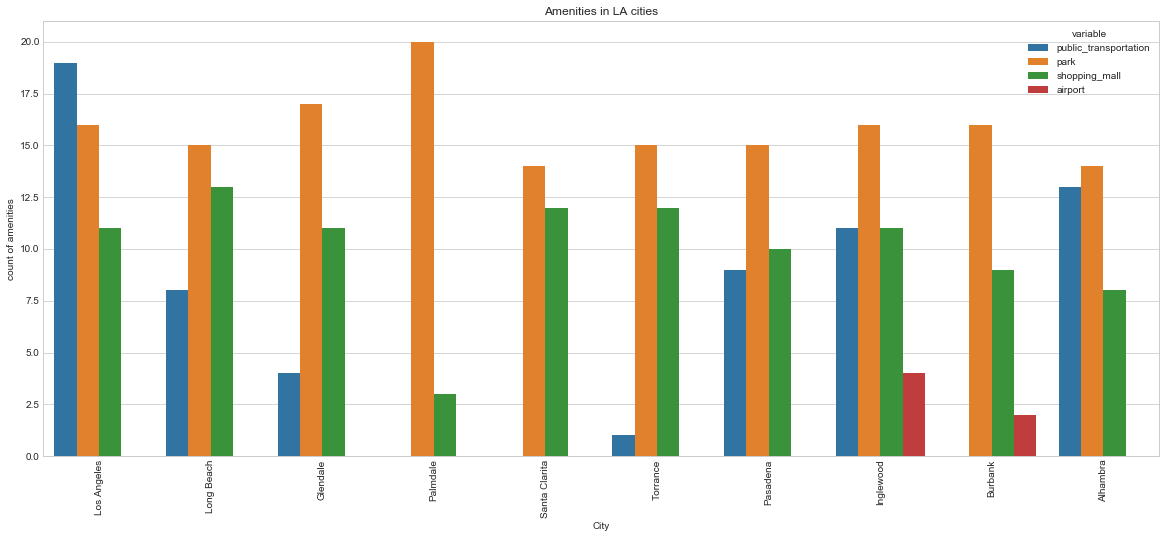

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
sns.barplot(x='City', y='value', hue='variable', data=cities_dfc)
plt.xticks(rotation=90)

plt.ylabel('count of amenities')
plt.title('Amenities in LA cities')
plt.show()

# Save the figure
plt.savefig("../Clean_Data/2.Amenities_by_city.png")